In [1]:
import pandas as pd

In [2]:
mimic = pd.read_parquet('MIMIC_F-C.parquet')

In [3]:
mimic.head()

,subject_id,hadm_id,stay_id,janela_index,inicio_janela,charttime,gender,anchor_age,FC,PAS,PAD,PAM,FR,SpO2,Temperatura (°F),Temperatura (°C),Peso,Altura,sepse
0,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 12:36:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.4,152.0,0
1,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:00:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,98.7,NaN,NaN,NaN,0
2,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:11:00,F,52,NaN,84.0,48.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:12:00,F,52,91.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0
4,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:13:00,F,52,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,0


In [ ]:
temp_cols = ['Temperatura (°F)', 'Temperatura (°C)']

# Cria uma função para calcular a porcentagem de preenchimento
def calcular_preenchimento(df_filtado, colunas, grupo='sepse'):
    resultado = {}
    total_por_grupo = df_filtado[grupo].value_counts().to_dict()

    for col in colunas:
        preenchido = df_filtado[~df_filtado[col].isna()].groupby(grupo)[col].count()
        porcentagem = {
            k: round((preenchido.get(k, 0) / total_por_grupo[k]) * 100, 2)
            for k in total_por_grupo
        }
        resultado[col] = porcentagem

    return pd.DataFrame(resultado)

# Aplica a função
preenchimento_temp = calcular_preenchimento(mimic, temp_cols)

# Exibe resultado
print("Porcentagem de preenchimento das colunas de temperatura:")
print(preenchimento_temp)


Porcentagem de preenchimento das colunas de temperatura:
   Temperatura (°F)  Temperatura (°C)
0             15.92              3.49
1             16.97              2.95


In [ ]:
# Garante que charttime é datetime
mimic['charttime'] = pd.to_datetime(mimic['charttime'])

# Cria uma flag onde há temperatura registrada
mimic['has_temp'] = mimic[['Temperatura (°F)', 'Temperatura (°C)']].notna().any(axis=1)

# Filtra apenas as linhas com temperatura
df_filtado_temp = mimic[mimic['has_temp']].copy()

# Ordena por paciente e tempo
df_filtado_temp = df_filtado_temp.sort_values(by=['subject_id', 'charttime'])

# Calcula o tempo entre medições por paciente
df_filtado_temp['intervalo_min'] = df_filtado_temp.groupby('subject_id')['charttime'].diff().dt.total_seconds() / 60

# Remove valores nulos (primeiras medições)
intervalos = df_filtado_temp['intervalo_min'].dropna()

# Estatísticas
media = intervalos.mean()
mediana = intervalos.median()
desvio = intervalos.std()

print(f"⏱️ Intervalo médio entre medições de temperatura: {media:.2f} min")
print(f"🔁 Mediana do intervalo: {mediana:.2f} min")
print(f"📉 Desvio padrão: {desvio:.2f} min")


⏱️ Intervalo médio entre medições de temperatura: 188.67 min
🔁 Mediana do intervalo: 240.00 min
📉 Desvio padrão: 124.25 min


In [5]:
mimic['Temperatura_final'] = mimic['Temperatura (°C)'].combine_first(mimic['Temperatura (°F)'])

In [6]:
mimic.head()

,subject_id,hadm_id,stay_id,janela_index,inicio_janela,charttime,gender,anchor_age,FC,PAS,PAD,PAM,FR,SpO2,Temperatura (°F),Temperatura (°C),Peso,Altura,sepse,Temperatura_final
0,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 12:36:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.4,152.0,0,NaN
1,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:00:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,98.7,NaN,NaN,NaN,0,98.7
2,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:11:00,F,52,NaN,84.0,48.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:12:00,F,52,91.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:13:00,F,52,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
temp_cols = ['Temperatura (°F)', 'Temperatura (°C)', 'Temperatura_final']

# Cria uma função para calcular a porcentagem de preenchimento
def calcular_preenchimento(df_filtado, colunas, grupo='sepse'):
    resultado = {}
    total_por_grupo = df_filtado[grupo].value_counts().to_dict()

    for col in colunas:
        preenchido = df_filtado_filtrado_filtrado_filtrado_filtrado_filtrado_filtrado_filtrado[~df_filtado[col].isna()].groupby(grupo)[col].count()
        porcentagem = {
            k: round((preenchido.get(k, 0) / total_por_grupo[k]) * 100, 2)
            for k in total_por_grupo
        }
        resultado[col] = porcentagem

    return pd.DataFrame(resultado)

# Aplica a função
preenchimento_temp = calcular_preenchimento(mimic, temp_cols)

# Exibe resultado
print("Porcentagem de preenchimento das colunas de temperatura:")
print(preenchimento_temp)


Porcentagem de preenchimento das colunas de temperatura:
   Temperatura (°F)  Temperatura (°C)  Temperatura_final
0             15.92              3.49              19.39
1             16.97              2.95              19.88


In [ ]:
def resumo_preenchimento(df_filtado, colunas):
    total = len(df_filtado)
    resultados = []

    for col in colunas:
        preenchido = df_filtado[col].notna().sum()
        porcentagem = round((preenchido / total) * 100, 2)
        resultados.append({
            'Coluna': col,
            'Valores Presentes': preenchido,
            'Total de Linhas': total,
            'Porcentagem Preenchida (%)': porcentagem
        })

    return pd.DataFrame(resultados).sort_values(by='Porcentagem Preenchida (%)', ascending=False)

# Lista das variáveis contínuas
colunas_continuas = [
    'FC', 'PAS', 'PAD', 'PAM', 'FR',
    'SpO2', 'Temperatura (°F)', 'Temperatura (°C)',
    'Temperatura_final', 'Peso', 'Altura'
]

# Gerar o resumo
resumo_continuas = resumo_preenchimento(mimic, colunas_continuas)

# Exibir resultado
print("Resumo do preenchimento das variáveis contínuas:")
resumo_continuas


Resumo do preenchimento das variáveis contínuas:


,Coluna,Valores Presentes,Total de Linhas,Porcentagem Preenchida (%)
0,FC,2669255,3767501,70.85
4,FR,2627574,3767501,69.74
5,SpO2,2609422,3767501,69.26
1,PAS,1709527,3767501,45.38
3,PAM,1703354,3767501,45.21
2,PAD,1703007,3767501,45.20
8,Temperatura_final,733676,3767501,19.47
6,Temperatura (°F),606303,3767501,16.09
7,Temperatura (°C),128220,3767501,3.40
9,Peso,49769,3767501,1.32


In [ ]:
df_filtado = mimic
# Lista de variáveis contínuas
variaveis_continuas = [
    'FC', 'PAS', 'PAD', 'PAM', 'FR',
    'SpO2', 'Temperatura_final', 'Peso', 'Altura'
]

# Inicializa o dicionário de contagem
faltas_por_variavel = {}

# Conta janelas onde a variável está completamente ausente
for var in variaveis_continuas:
    # Agrupa por janela_index e verifica se todos os valores são NaN naquela variável
    faltando_em_janelas = df_filtado.groupby('janela_index')[var].apply(lambda x: x.isna().all())
    
    # Soma quantas janelas estão completamente sem a variável
    qtd_janelas_faltando = faltando_em_janelas.sum()
    
    faltas_por_variavel[var] = qtd_janelas_faltando

# Transforma em DataFrame
faltas_df_filtado = pd.DataFrame.from_dict(faltas_por_variavel, orient='index', columns=['Janelas com todos os valores ausentes'])
faltas_df_filtado.index.name = 'Variável'
faltas_df_filtado = faltas_df_filtado.sort_values(by='Janelas com todos os valores ausentes', ascending=False)


In [ ]:
faltas_df_filtado

,Janelas com todos os valores ausentes
Variável,
Altura,14
Peso,13
FC,0
PAS,0
PAD,0
PAM,0
FR,0
SpO2,0
Temperatura_final,0


In [ ]:
import pandas as pd

# Lista de variáveis contínuas
variaveis_continuas = [
    'FC', 'PAS', 'PAD', 'PAM', 'FR',
    'SpO2', 'Temperatura_final', 'Peso', 'Altura'
]

# Garante que a coluna janela_index existe
# Total de janelas únicas
total_janelas = df_filtado['janela_index'].nunique()

# Inicializa a lista de resultados
resultados = []

# Conta janelas onde cada variável está completamente ausente
for var in variaveis_continuas:
    faltando_em_janelas = df_filtado.groupby('janela_index')[var].apply(lambda x: x.isna().all())
    qtd_janelas_faltando = faltando_em_janelas.sum()
    porcentagem = round((qtd_janelas_faltando / total_janelas) * 100, 2)
    
    resultados.append({
        'Variável': var,
        'Janelas ausentes': qtd_janelas_faltando,
        'Total de janelas': total_janelas,
        'Porcentagem de janelas ausentes (%)': porcentagem
    })

# Transforma em DataFrame
faltas_df_filtado = pd.DataFrame(resultados).sort_values(by='Porcentagem de janelas ausentes (%)', ascending=False)

# Exibe o resultado
faltas_df_filtado


,Variável,Janelas ausentes,Total de janelas,Porcentagem de janelas ausentes (%)
8,Altura,14,20,70.0
7,Peso,13,20,65.0
0,FC,0,20,0.0
1,PAS,0,20,0.0
2,PAD,0,20,0.0
3,PAM,0,20,0.0
4,FR,0,20,0.0
5,SpO2,0,20,0.0
6,Temperatura_final,0,20,0.0


In [ ]:
# Conta quantas medições de temperatura há por paciente
temp_por_paciente = df_filtado.groupby('subject_id')['Temperatura_final'].apply(lambda x: x.notna().sum())

# Estatísticas
media = temp_por_paciente.mean()
mediana = temp_por_paciente.median()
desvio = temp_por_paciente.std()

# Resultado
print(f"📊 Temperatura por paciente:")
print(f"→ Média de medições: {media:.2f}")
print(f"→ Mediana de medições: {mediana}")
print(f"→ Desvio padrão: {desvio:.2f}")

📊 Temperatura por paciente:
→ Média de medições: 14.41
→ Mediana de medições: 12.0
→ Desvio padrão: 11.50


In [42]:
# Calcula tempo de internação real (em dias) por paciente
tempo_por_paciente = (
    df_filtado.groupby('subject_id')['charttime']
    .agg(['min', 'max'])
    .assign(dias=lambda x: (x['max'] - x['min']).dt.total_seconds() / (3600 * 24))
)
media_dias = tempo_por_paciente['dias'].mean()
mediana_dias = tempo_por_paciente['dias'].median()
desvio_dias = tempo_por_paciente['dias'].std()
max_dias = tempo_por_paciente['dias'].max()

print(f"Média: {media_dias:.2f} dias")
print(f"Mediana: {mediana_dias:.2f} dias")
print(f"Desvio padrão: {desvio_dias:.2f} dias")
print(f"Máximo: {max_dias:.2f} dias")

Média: 1.98 dias
Mediana: 1.85 dias
Desvio padrão: 1.04 dias
Máximo: 3.33 dias


C:\Users\renan\AppData\Local\Temp\ipykernel_10168\1280819861.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


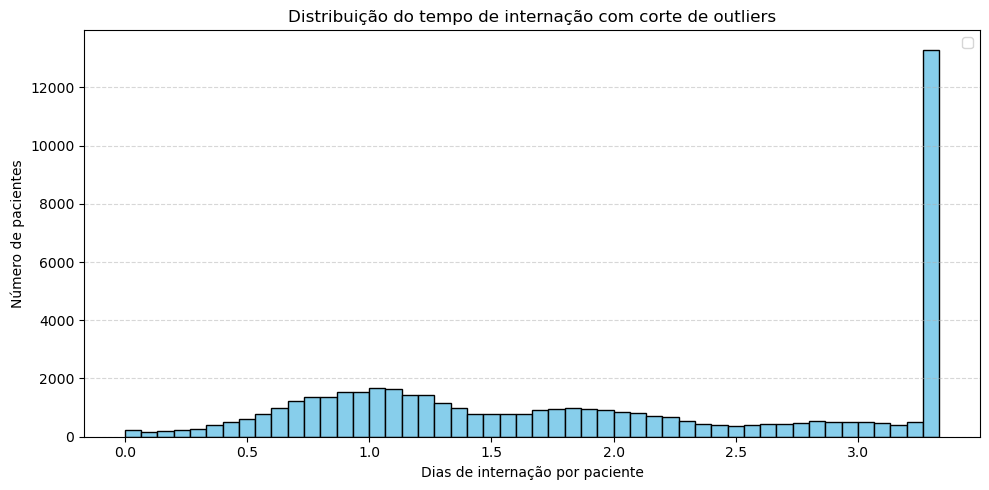

Outliers foram definidos como pacientes com tempo de internação acima de 2 desvios padrão da média. media + 2 vezes desvio padrão


In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(tempo_por_paciente['dias'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Dias de internação por paciente')
plt.ylabel('Número de pacientes')
plt.title('Distribuição do tempo de internação com corte de outliers')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
print("Outliers foram definidos como pacientes com tempo de internação acima de 2 desvios padrão da média. media + 2 vezes desvio padrão")

## NAO PASSAR


In [17]:
dataset = pd.read_parquet('MIMIC_F-C-sem_janelas.parquet')

In [18]:
dataset.head()

,subject_id,hadm_id,stay_id,charttime,gender,anchor_age,FC,PAS,PAD,PAM,FR,SpO2,Temperatura (°F),Temperatura (°C),Peso,Altura,sepse
0,10000032,29079034,39553978,2180-07-23 12:36:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.4,152.0,0
1,10000032,29079034,39553978,2180-07-23 14:00:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,98.7,NaN,NaN,NaN,0
2,10000032,29079034,39553978,2180-07-23 14:11:00,F,52,NaN,84.0,48.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10000032,29079034,39553978,2180-07-23 14:12:00,F,52,91.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0
4,10000032,29079034,39553978,2180-07-23 14:13:00,F,52,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,0


In [10]:
temp_cols = ['Temperatura (°F)', 'Temperatura (°C)']

# Cria uma função para calcular a porcentagem de preenchimento
def calcular_preenchimento(dataset, colunas, grupo='sepse'):
    resultado = {}
    total_por_grupo = dataset[grupo].value_counts().to_dict()

    for col in colunas:
        preenchido = dataset[~dataset[col].isna()].groupby(grupo)[col].count()
        porcentagem = {
            k: round((preenchido.get(k, 0) / total_por_grupo[k]) * 100, 2)
            for k in total_por_grupo
        }
        resultado[col] = porcentagem

    return pd.DataFrame(resultado)

# Aplica a função
preenchimento_temp = calcular_preenchimento(dataset, temp_cols)

# Exibe resultado
print("Porcentagem de preenchimento das colunas de temperatura:")
print(preenchimento_temp)


Porcentagem de preenchimento das colunas de temperatura:
   Temperatura (°F)  Temperatura (°C)
0             16.51              3.11
1             17.87              3.29


In [19]:
dataset['Temperatura_final'] = dataset['Temperatura (°C)'].combine_first(dataset['Temperatura (°F)'])

In [85]:
def resumo_preenchimento(df_filtado, colunas):
    total = len(df_filtado)
    resultados = []

    for col in colunas:
        preenchido = df_filtado[col].notna().sum()
        porcentagem = round((preenchido / total) * 100, 2)
        resultados.append({
            'Coluna': col,
            'Valores Presentes': preenchido,
            'Total de Linhas': total,
            'Porcentagem Preenchida (%)': porcentagem
        })

    return pd.DataFrame(resultados).sort_values(by='Porcentagem Preenchida (%)', ascending=False)

# Lista das variáveis contínuas
colunas_continuas = [
    'FC', 'PAS', 'PAD', 'PAM', 'FR',
    'SpO2', 'Temperatura (°F)', 'Temperatura (°C)',
    'Temperatura_final', 'Peso', 'Altura'
]

# Gerar o resumo
resumo_continuas = resumo_preenchimento(dataset, colunas_continuas)

# Exibir resultado
print("Resumo do preenchimento das variáveis contínuas:")
resumo_continuas


Resumo do preenchimento das variáveis contínuas:


,Coluna,Valores Presentes,Total de Linhas,Porcentagem Preenchida (%)
0,FC,3771682,5289666,71.30
4,FR,3712282,5289666,70.18
5,SpO2,3688983,5289666,69.74
1,PAS,2379004,5289666,44.97
2,PAD,2370214,5289666,44.81
3,PAM,2370399,5289666,44.81
8,Temperatura_final,1037567,5289666,19.61
6,Temperatura (°F),876700,5289666,16.57
7,Temperatura (°C),162208,5289666,3.07
9,Peso,49047,5289666,0.93


In [12]:
# Calcula tempo de internação real (em dias) por paciente
tempo_por_paciente = (
    dataset.groupby('subject_id')['charttime']
    .agg(['min', 'max'])
    .assign(dias=lambda x: (x['max'] - x['min']).dt.total_seconds() / (3600 * 24))
)
media_dias = tempo_por_paciente['dias'].mean()
mediana_dias = tempo_por_paciente['dias'].median()
desvio_dias = tempo_por_paciente['dias'].std()
max_dias = tempo_por_paciente['dias'].max()

print(f"Média: {media_dias:.2f} dias")
print(f"Mediana: {mediana_dias:.2f} dias")
print(f"Desvio padrão: {desvio_dias:.2f} dias")
print(f"Máximo: {max_dias:.2f} dias")

Média: 3.36 dias
Mediana: 1.86 dias
Desvio padrão: 5.33 dias
Máximo: 370.93 dias


In [13]:
limite_superior = media_dias + 2 * desvio_dias

# Pacientes com tempo acima do limite
outliers = tempo_por_paciente[tempo_por_paciente['dias'] > limite_superior]

print(f"Número de outliers: {len(outliers)}")
print(outliers.sort_values('dias', ascending=False).head())

Número de outliers: 1747
                           min                 max        dias
subject_id                                                    
18138079   2180-01-03 23:35:00 2181-01-08 22:01:00  370.934722
16661755   2174-06-07 22:57:00 2175-06-11 20:00:00  368.877083
14411859   2162-12-28 22:40:00 2163-04-09 13:00:00  101.597222
10699336   2158-01-07 19:25:00 2158-04-17 10:00:00   99.607639
15149227   2143-11-27 21:54:00 2144-03-02 17:00:00   95.795833


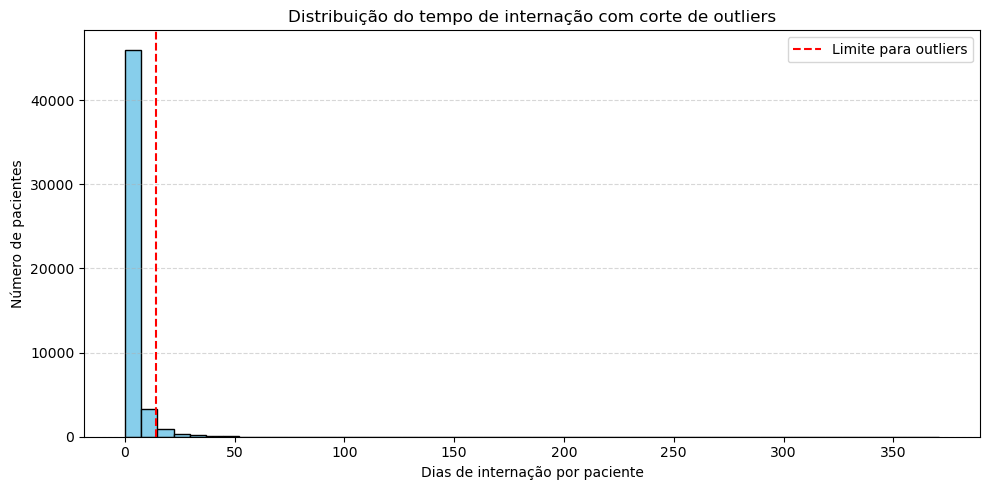

Outliers foram definidos como pacientes com tempo de internação acima de 2 desvios padrão da média. media + 2 vezes desvio padrão


In [55]:
plt.figure(figsize=(10, 5))
plt.hist(tempo_por_paciente['dias'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(limite_superior, color='red', linestyle='--', label='Limite para outliers')
plt.xlabel('Dias de internação por paciente')
plt.ylabel('Número de pacientes')
plt.title('Distribuição do tempo de internação com corte de outliers')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
print("Outliers foram definidos como pacientes com tempo de internação acima de 2 desvios padrão da média. media + 2 vezes desvio padrão")

In [20]:
duracao_pacientes = (
    dataset.groupby('subject_id')['charttime']
    .agg(['min', 'max'])
    .assign(dias=lambda x: (x['max'] - x['min']).dt.days)
)

# Filtra apenas pacientes com internação de até 90 dias
pacientes_validos = duracao_pacientes[duracao_pacientes['dias'] <= 89].index

# Filtra o dataframe original
df_filtado_filtrado = dataset[dataset['subject_id'].isin(pacientes_validos)].copy()

# Exibe quantos pacientes foram removidos
pacientes_removidos = dataset['subject_id'].nunique() - df_filtado_filtrado['subject_id'].nunique()
print(f"🔍 Pacientes removidos por ultrapassarem 90 dias de internação: {pacientes_removidos}")
print(f"✅ Pacientes restantes: {df_filtado_filtrado['subject_id'].nunique()}")

🔍 Pacientes removidos por ultrapassarem 90 dias de internação: 6
✅ Pacientes restantes: 50904


In [21]:
dataset = df_filtado_filtrado

In [22]:
# Calcula tempo de internação real (em dias) por paciente
tempo_por_paciente = (
    dataset.groupby('subject_id')['charttime']
    .agg(['min', 'max'])
    .assign(dias=lambda x: (x['max'] - x['min']).dt.total_seconds() / (3600 * 24))
)
media_dias = tempo_por_paciente['dias'].mean()
mediana_dias = tempo_por_paciente['dias'].median()
desvio_dias = tempo_por_paciente['dias'].std()
max_dias = tempo_por_paciente['dias'].max()

print(f"Média: {media_dias:.2f} dias")
print(f"Mediana: {mediana_dias:.2f} dias")
print(f"Desvio padrão: {desvio_dias:.2f} dias")
print(f"Máximo: {max_dias:.2f} dias")

Média: 3.34 dias
Mediana: 1.86 dias
Desvio padrão: 4.73 dias
Máximo: 86.78 dias


C:\Users\renan\AppData\Local\Temp\ipykernel_10168\1494358558.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


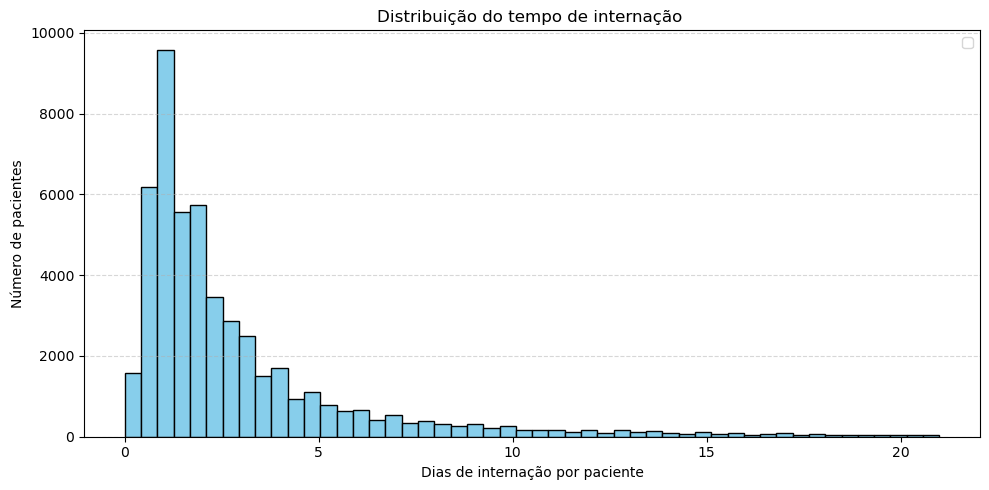

In [69]:
plt.figure(figsize=(10, 5))
plt.hist(tempo_por_paciente['dias'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Dias de internação por paciente')
plt.ylabel('Número de pacientes')
plt.title('Distribuição do tempo de internação ')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [23]:
# Conta quantas medições de temperatura há por paciente
temp_por_paciente = df_filtado_filtrado.groupby('subject_id')['Temperatura_final'].apply(lambda x: x.notna().sum())

# Estatísticas
media = temp_por_paciente.mean()
mediana = temp_por_paciente.median()
desvio = temp_por_paciente.std()

# Resultado
print(f"📊 Temperatura por paciente:")
print(f"→ Média de medições: {media:.2f}")
print(f"→ Mediana de medições: {mediana}")
print(f"→ Desvio padrão: {desvio:.2f}")

📊 Temperatura por paciente:
→ Média de medições: 23.67
→ Mediana de medições: 12.0
→ Desvio padrão: 38.05


In [24]:
temp_cols = ['Temperatura (°F)', 'Temperatura (°C)', 'Temperatura_final']

# Cria uma função para calcular a porcentagem de preenchimento
def calcular_preenchimento(df_filtado, colunas, grupo='sepse'):
    resultado = {}
    total_por_grupo = df_filtado[grupo].value_counts().to_dict()

    for col in colunas:
        preenchido = df_filtado[~df_filtado[col].isna()].groupby(grupo)[col].count()
        porcentagem = {
            k: round((preenchido.get(k, 0) / total_por_grupo[k]) * 100, 2)
            for k in total_por_grupo
        }
        resultado[col] = porcentagem

    return pd.DataFrame(resultado)

# Aplica a função
preenchimento_temp = calcular_preenchimento(dataset, temp_cols)

# Exibe resultado
print("Porcentagem de preenchimento das colunas de temperatura:")
print(preenchimento_temp)


Porcentagem de preenchimento das colunas de temperatura:
   Temperatura (°F)  Temperatura (°C)  Temperatura_final
0             16.51              3.11              19.59
1             17.86              3.29              21.10


#### adicionar as janelas agora pra fazer estatisticas das janelas e remover as colunas temp f e temp c deixar somente a temp f 

In [27]:
dataset.head()

,subject_id,hadm_id,stay_id,charttime,gender,anchor_age,FC,PAS,PAD,PAM,FR,SpO2,Temperatura (°F),Temperatura (°C),Peso,Altura,sepse,Temperatura_final
0,10000032,29079034,39553978,2180-07-23 12:36:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.4,152.0,0,NaN
1,10000032,29079034,39553978,2180-07-23 14:00:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,98.7,NaN,NaN,NaN,0,98.7
2,10000032,29079034,39553978,2180-07-23 14:11:00,F,52,NaN,84.0,48.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,10000032,29079034,39553978,2180-07-23 14:12:00,F,52,91.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,10000032,29079034,39553978,2180-07-23 14:13:00,F,52,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,0,NaN


In [40]:
import numpy as np
# Ordena para garantir consistência
dataset = dataset.sort_values(['subject_id', 'stay_id', 'charttime']).reset_index(drop=True)

# Função para criar no máximo 10 janelas de 4h
def atribuir_janelas_10x4h(grupo):
    inicio = grupo['charttime'].min()

    # Diferença em horas desde o início
    delta_horas = (grupo['charttime'] - inicio).dt.total_seconds() / 3600.0

    # Define índice da janela
    janela_index = np.floor(delta_horas / 4).astype(int)

    # Só mantém as janelas até a 9 (total 10 janelas)
    mask = janela_index < 515
    grupo = grupo.loc[mask].copy()

    grupo['janela_index'] = janela_index[mask].values
    grupo['inicio_janela'] = inicio + pd.to_timedelta(grupo['janela_index'] * 4, unit='h')

    return grupo

# Aplica por paciente/internação
df_janelado = dataset.groupby(['subject_id', 'stay_id'], group_keys=False).apply(atribuir_janelas_10x4h)

C:\Users\renan\AppData\Local\Temp\ipykernel_16920\3480555466.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_janelado = dataset.groupby(['subject_id', 'stay_id'], group_keys=False).apply(atribuir_janelas_10x4h)


In [29]:
df_janelado.head()

,subject_id,hadm_id,stay_id,charttime,gender,anchor_age,FC,PAS,PAD,PAM,FR,SpO2,Temperatura (°F),Temperatura (°C),Peso,Altura,sepse,Temperatura_final,janela_index,inicio_janela
0,10000032,29079034,39553978,2180-07-23 12:36:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.4,152.0,0,NaN,0,2180-07-23 12:36:00
1,10000032,29079034,39553978,2180-07-23 14:00:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,98.7,NaN,NaN,NaN,0,98.7,0,2180-07-23 12:36:00
2,10000032,29079034,39553978,2180-07-23 14:11:00,F,52,NaN,84.0,48.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2180-07-23 12:36:00
3,10000032,29079034,39553978,2180-07-23 14:12:00,F,52,91.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2180-07-23 12:36:00
4,10000032,29079034,39553978,2180-07-23 14:13:00,F,52,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,0,NaN,0,2180-07-23 12:36:00


In [41]:
cols = df_janelado.columns.tolist()

# Define a nova ordem: traz janela_index e inicio_janela para antes do charttime
nova_ordem = (
    ['subject_id', 'hadm_id', 'stay_id', 'janela_index', 'inicio_janela', 'charttime'] +
    [col for col in cols if col not in ['subject_id', 'hadm_id', 'stay_id', 'janela_index', 'inicio_janela', 'charttime']]
)

# Reorganiza o DataFrame
df_janelas = df_janelado[nova_ordem]
df_janelas.head()

,subject_id,hadm_id,stay_id,janela_index,inicio_janela,charttime,gender,anchor_age,FC,PAS,PAD,PAM,FR,SpO2,Temperatura (°F),Temperatura (°C),Peso,Altura,sepse,Temperatura_final
0,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 12:36:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.4,152.0,0,NaN
1,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:00:00,F,52,NaN,NaN,NaN,NaN,NaN,NaN,98.7,NaN,NaN,NaN,0,98.7
2,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:11:00,F,52,NaN,84.0,48.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:12:00,F,52,91.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,10000032,29079034,39553978,0,2180-07-23 12:36:00,2180-07-23 14:13:00,F,52,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,0,NaN


In [42]:
paciente_id = 10000032
df_paciente = df_janelado[df_janelado['subject_id'] == paciente_id]

# Conta os valores únicos de 'janela_index'
num_janelas = df_paciente['janela_index'].nunique()

print(f'O paciente {paciente_id} aparece em {num_janelas} janela(s).')

O paciente 10000032 aparece em 3 janela(s).


In [44]:
# Lista de variáveis contínuas
variaveis_continuas = [
    'FC',	'PAS',	'PAD',	'PAM',	'FR',	'SpO2',	'Peso','Altura',	'sepse',	'Temperatura_final'
]

# Inicializa o dicionário de contagem
faltas_por_variavel = {}

# Conta janelas onde a variável está completamente ausente
for var in variaveis_continuas:
    # Agrupa por janela_index e verifica se todos os valores são NaN naquela variável
    faltando_em_janelas = df_janelas.groupby('janela_index')[var].apply(lambda x: x.isna().all())
    
    # Soma quantas janelas estão completamente sem a variável
    qtd_janelas_faltando = faltando_em_janelas.sum()
    
    faltas_por_variavel[var] = qtd_janelas_faltando

# Transforma em DataFrame
faltas_df_filtado = pd.DataFrame.from_dict(faltas_por_variavel, orient='index', columns=['Janelas com todos os valores ausentes'])
faltas_df_filtado.index.name = 'Variável'
faltas_df_filtado = faltas_df_filtado.sort_values(by='Janelas com todos os valores ausentes', ascending=False)
faltas_df_filtado

,Janelas com todos os valores ausentes
Variável,
Altura,507
Peso,504
Temperatura_final,1
FC,0
PAS,0
PAD,0
PAM,0
FR,0
SpO2,0


In [45]:
variaveis_continuas = [
    'FC',	'PAS',	'PAD',	'PAM',	'FR',	'SpO2',	'Peso','Altura',	'sepse',	'Temperatura_final'
]


total_janelas = df_janelas['janela_index'].nunique()

# Inicializa a lista de resultados
resultados = []

# Conta janelas onde cada variável está completamente ausente
for var in variaveis_continuas:
    faltando_em_janelas = df_janelas.groupby('janela_index')[var].apply(lambda x: x.isna().all())
    qtd_janelas_faltando = faltando_em_janelas.sum()
    porcentagem = round((qtd_janelas_faltando / total_janelas) * 100, 2)
    
    resultados.append({
        'Variável': var,
        'Janelas ausentes': qtd_janelas_faltando,
        'Total de janelas': total_janelas,
        'Porcentagem de janelas ausentes (%)': porcentagem
    })

# Transforma em DataFrame
faltas_df_filtado = pd.DataFrame(resultados).sort_values(by='Porcentagem de janelas ausentes (%)', ascending=False)

# Exibe o resultado
faltas_df_filtado


,Variável,Janelas ausentes,Total de janelas,Porcentagem de janelas ausentes (%)
7,Altura,507,515,98.45
6,Peso,504,515,97.86
9,Temperatura_final,1,515,0.19
0,FC,0,515,0.00
1,PAS,0,515,0.00
2,PAD,0,515,0.00
3,PAM,0,515,0.00
4,FR,0,515,0.00
5,SpO2,0,515,0.00
8,sepse,0,515,0.00
